In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def converter_preços(preco):
    return float(preco.replace(",","").replace(' ','').split('$')[1])

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df_customers = pd.read_csv('C:/Users/raisson.vieira/Documents/Global Eletronics/Customers.csv',encoding='unicode_escape')
df_stores = pd.read_csv('C:/Users/raisson.vieira/Documents/Global Eletronics/Stores.csv',encoding='unicode_escape')
df_exchange = pd.read_csv('C:/Users/raisson.vieira/Documents/Global Eletronics/Exchange_Rates.csv',encoding='unicode_escape')
df_sales = pd.read_csv('C:/Users/raisson.vieira/Documents/Global Eletronics/Sales.csv',encoding='unicode_escape')
df_products = pd.read_csv('C:/Users/raisson.vieira/Documents/Global Eletronics/Products.csv',encoding='unicode_escape')

In [5]:
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [6]:
df_customers.head(10)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
5,1086,Male,Hayden Clegg,TEMPLERS,SA,South Australia,5371,Australia,Australia,1/20/1954
6,1133,Male,Nicholas Caffyn,JUBILEE POCKET,QLD,Queensland,4802,Australia,Australia,11/22/1969
7,1256,Male,Lincoln Jenks,KULLOGUM,QLD,Queensland,4660,Australia,Australia,3/12/1950
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,12/21/1965
9,1568,Male,Luke Virtue,KOTTA,VIC,Victoria,3565,Australia,Australia,7/25/1975


In [7]:
df_customers.tail(10)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
15256,2098944,Female,Emmeline Daviau,Reston,MD,Maryland,20191,United States,North America,4/1/1978
15257,2099252,Female,Angelika Nowicka,Los Angeles,CA,California,90071,United States,North America,1/27/2001
15258,2099258,Female,Zorica Cerkez,Metropolis,IL,Illinois,62960,United States,North America,7/15/1993
15259,2099383,Female,Yseult Lacharité,Indianapolis,IN,Indiana,46268,United States,North America,2/24/2000
15260,2099497,Female,Borislava Hrvatin,Lorton,VA,Virginia,22079,United States,North America,3/25/1947
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937
15265,2099937,Male,Zygmunt Kaminski,Bloomfield Township,MI,Michigan,48302,United States,North America,8/18/1965


In [8]:
df_customers.shape

(15266, 10)

In [9]:
df_exchange.shape

(11215, 3)

In [10]:
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [11]:
df_products.shape

(2517, 10)

In [12]:
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [13]:
df_sales.shape

(62884, 9)

In [14]:
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [15]:
df_stores.shape

(67, 5)

# Manipulações

In [16]:
df_products['Category'].value_counts()

Category
Home Appliances                  661
Computers                        606
Cameras and camcorders           372
Cell phones                      285
TV and Video                     222
Games and Toys                   166
Audio                            115
Music, Movies and Audio Books     90
Name: count, dtype: int64

In [17]:
df_products.iloc[0:3]

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio


In [18]:
df_products.describe()

,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


In [19]:
df_products[df_products['Color'] == 'Black']

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
5,6,Contoso 2G MP3 Player E200 Black,Contoso,Black,$11.00,$21.57,101,MP4&MP3,1,Audio
8,9,Contoso 4G MP3 Player E400 Black,Contoso,Black,$30.58,$59.99,101,MP4&MP3,1,Audio
12,13,Contoso 4GB Flash MP3 Player E401 Black,Contoso,Black,$35.72,$77.68,101,MP4&MP3,1,Audio
19,20,Contoso 8GB MP3 Player new model M820 Black,Contoso,Black,$61.62,$134.00,101,MP4&MP3,1,Audio
24,25,Contoso 16GB Mp5 Player M1600 Black,Contoso,Black,$91.93,$199.90,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2497,2498,Contoso Phone Tough Skin Case E140 Black,Contoso,Black,$12.09,$23.72,505,Cell phones Accessories,5,Cell phones
2501,2502,Contoso Touch Stylus Pen E150 Black,Contoso,Black,$5.09,$9.99,505,Cell phones Accessories,5,Cell phones
2508,2509,Contoso Original K1m Li-Ion Standard Battery E...,Contoso,Black,$2.07,$4.06,505,Cell phones Accessories,5,Cell phones
2511,2512,Contoso Bluetooth Active Headphones L15 Black,Contoso,Black,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones


In [20]:
df_products.loc[8, 'Unit Price USD']

'$59.99 '

In [21]:
df_products.loc[8, 'Unit Price USD'].replace(' ','')

'$59.99'

In [22]:
df_products.loc[8, 'Unit Price USD'].replace('$','')

'59.99 '

In [23]:
df_products.loc[8, 'Unit Price USD'].split('$')[1].replace(' ','')

'59.99'

In [24]:
float(df_products.loc[8, 'Unit Price USD'].split('$')[1].replace(' ',''))

59.99

# Corrigir Preços

In [25]:
df_products['Unit Price USD'] = df_products['Unit Price USD'].apply(lambda x :converter_preços(x))

In [26]:
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].apply(lambda x :converter_preços(x))

In [27]:
type(df_products['Unit Price USD'])

pandas.core.series.Series

In [28]:
df_products.dtypes

ProductKey          int64
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
SubcategoryKey      int64
Subcategory        object
CategoryKey         int64
Category           object
dtype: object

In [29]:
df_products.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [30]:
df_sales.isna().sum()['Delivery Date']

49719

In [31]:
df_sales.shape

(62884, 9)

In [32]:
df_sales.isna().sum()['Delivery Date']/df_sales.shape[0]*100

79.064626932129

In [33]:
#df_sales.dropna(inplace=True)

In [34]:
df_sales.shape

(62884, 9)

In [35]:
df_sales.isna().sum()['Delivery Date']

49719

In [36]:
df_sales.drop('Delivery Date',axis=1, inplace=True)

In [37]:
df_sales.columns

Index(['Order Number', 'Line Item', 'Order Date', 'CustomerKey', 'StoreKey',
       'ProductKey', 'Quantity', 'Currency Code'],
      dtype='object')

In [38]:
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [39]:
df_products[(df_products['Brand'] == 'Contoso') & 
            (df_products['SubcategoryKey'] == 101) &
            (df_products['Unit Cost USD'] < 10) &
            (df_products['Product Name'].str.contains("E100"))]

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.4,14.52,101,MP4&MP3,1,Audio


In [40]:
df_sales.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [41]:
df_products[['Unit Cost USD','Unit Price USD']].mean()

Unit Cost USD     147.655562
Unit Price USD    356.830131
dtype: float64

In [42]:
df_products[['Unit Cost USD','Unit Price USD']].std()

Unit Cost USD     184.373683
Unit Price USD    494.054962
dtype: float64

In [43]:
df_products[['Unit Cost USD','Unit Price USD']].median()

Unit Cost USD      86.67
Unit Price USD    199.99
dtype: float64

In [44]:
df_products[['Unit Cost USD','Unit Price USD']].var()

Unit Cost USD      33993.654842
Unit Price USD    244090.305248
dtype: float64

In [45]:
df_products[['Unit Cost USD','Unit Price USD']].mode()

,Unit Cost USD,Unit Price USD
0,15.29,29.99


In [46]:
df_products[['Unit Cost USD','Unit Price USD']].describe()

,Unit Cost USD,Unit Price USD
count,2517.000000,2517.000000
mean,147.655562,356.830131
std,184.373683,494.054962
min,0.480000,0.950000
25%,32.250000,69.000000
50%,86.670000,199.990000
75%,183.950000,410.000000
max,1060.220000,3199.990000


In [47]:
df_products[['Brand','Unit Cost USD','Unit Price USD','Subcategory','Category']]

,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category
0,Contoso,6.62,12.99,MP4&MP3,Audio
1,Contoso,6.62,12.99,MP4&MP3,Audio
2,Contoso,7.40,14.52,MP4&MP3,Audio
3,Contoso,11.00,21.57,MP4&MP3,Audio
4,Contoso,11.00,21.57,MP4&MP3,Audio
...,...,...,...,...,...
2512,Contoso,43.07,129.99,Cell phones Accessories,Cell phones
2513,Contoso,43.07,129.99,Cell phones Accessories,Cell phones
2514,Contoso,1.71,3.35,Cell phones Accessories,Cell phones
2515,Contoso,1.71,3.35,Cell phones Accessories,Cell phones


In [48]:
df_grouped = df_products[['Brand','Unit Cost USD','Unit Price USD','Subcategory','Category']].groupby(by=['Brand','Subcategory','Category'])\
            .agg({'Unit Cost USD':'mean','Unit Price USD':'median'})

In [49]:
df_grouped

Unit Cost USD  \
Brand                Subcategory                      Category                                       
A. Datum             Digital Cameras                  Cameras and camcorders             85.654800   
                     Digital SLR Cameras              Cameras and camcorders            169.154687   
Adventure Works      Coffee Machines                  Home Appliances                   219.943333   
                     Desktops                         Computers                         233.649545   
                     Lamps                            Home Appliances                    95.632500   
                     Laptops                          Computers                         291.847143   
                     Monitors                         Computers                         117.100000   
                     Televisions                      TV and Video                      290.125200   
Contoso              Air Conditioners                 Home Appliances                   159.272857   
                     Cameras & Camcorders Accessories Cameras and camcorders             38.152029   
                     Cell phones Accessories          Cell phones                         9.814667   
                     Coffee Machines                  Home Appliances                   219.943333   
                     Computers Accessories            Computers                          16.781689   
                     Digital SLR Cameras              Cameras and camcorders            176.899375   
                     Home & Office Phones             Cell phones                        13.152500   
                     Home Theater System              TV and Video                      194.267692   
                     MP4&MP3                          Audio                              60.831778   
                     Microwaves                       Home Appliances                    94.360000   
                     Movie DVD                        Music, Movies and Audio Books      42.109333   
                     Projectors & Screens             Computers                         275.205833   
                     Touch Screen Phones              Cell phones                       119.648182   
                     Washers & Dryers                 Home Appliances                   790.780000   
                     Water Heaters                    Home Appliances                   331.646129   
Fabrikam             Camcorders                       Cameras and camcorders            299.944660   
                     Coffee Machines                  Home Appliances                   214.091538   
                     Digital SLR Cameras              Cameras and camcorders            163.015000   
                     Laptops                          Computers                         255.253333   
                     Microwaves                       Home Appliances                    94.360000   
                     Refrigerators                    Home Appliances                   343.718333   
Litware              Fans                             Home Appliances                    38.115128   
                     Home Theater System              TV and Video                      262.318750   
                     Lamps                            Home Appliances                    99.190789   
                     Microwaves                       Home Appliances                    94.360000   
                     Refrigerators                    Home Appliances                   342.643182   
                     Washers & Dryers                 Home Appliances                   790.780000   
Northwind Traders    Bluetooth Headphones             Audio                              28.962963   
                     Washers & Dryers                 Home Appliances                   791.190000   
Proseware            Air Conditioners                 Home Appliances                   163.094815   
     

# Junção de Tabelas

In [50]:
df_sales.merge(df_products, on='ProductKey')

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,1/1/2016,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,378002,2,1/13/2016,1599716,45,1304,1,USD,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
2,868008,2,5/17/2017,1540067,51,1304,1,USD,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
3,1078002,1,12/13/2017,631631,18,1304,1,EUR,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
4,1371000,1,10/2/2018,1257599,48,1304,8,USD,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2227000,1,2/4/2021,345767,0,2396,1,CAD,Proseware Air conditioner 5200BTU E100 Red,Proseware,Red,56.08,109.99,807,Air Conditioners,8,Home Appliances
62880,1869040,1,2/12/2020,1609589,54,2319,6,USD,Litware Floor Lamp M2015 White,Litware,White,155.89,339.00,806,Lamps,8,Home Appliances
62881,1879072,2,2/22/2020,1365154,55,2311,9,USD,Litware Floor Lamp M2015 Black,Litware,Black,155.89,339.00,806,Lamps,8,Home Appliances
62882,1948015,1,5/1/2020,1811432,0,216,6,USD,Litware Home Theater System 4.1 Channel M413 S...,Litware,Silver,252.47,549.00,203,Home Theater System,2,TV and Video


In [51]:
df_merge= df_sales.merge(df_products, on='ProductKey')

In [52]:
df_merge.sort_values(by='CustomerKey', ascending=True, inplace=True,ignore_index=True)

In [53]:
df_merge.head(10)

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1776007,1,11/11/2019,301,0,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio
1,1830002,4,1/4/2020,325,0,1790,4,AUD,MGS Dungeon Siege: Legends of Aranna 2009 E146,Tailspin Toys,Silver,21.92,43.00,702,Download Games,7,Games and Toys
2,1781006,1,11/16/2019,325,6,418,3,AUD,Adventure Works Desktop PC1.60 ED160 Silver,Adventure Works,Silver,137.63,269.95,303,Desktops,3,Computers
3,1830002,2,1/4/2020,325,0,731,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,59.32,129.00,306,"Printers, Scanners & Fax",3,Computers
4,1109001,2,1/13/2018,325,6,656,4,AUD,"Proseware Desk Jet All-in-One Printer, Scanner...",Proseware,Black,72.66,158.00,306,"Printers, Scanners & Fax",3,Computers
5,1830002,5,1/4/2020,325,0,1068,1,AUD,A. Datum SLR Camera X141 Blue,A. Datum,Blue,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
6,1781006,2,11/16/2019,325,6,75,3,AUD,NT Bluetooth Active Headphones E202 White,Northwind Traders,White,17.45,37.95,106,Bluetooth Headphones,1,Audio
7,1109001,1,1/13/2018,325,6,443,4,AUD,WWI Desktop PC3.0 M0300 Silver,Wide World Importers,Silver,160.49,349.00,303,Desktops,3,Computers
8,1830002,1,1/4/2020,325,0,715,1,AUD,Proseware Duplex Scanner M200 White,Proseware,White,68.52,149.00,306,"Printers, Scanners & Fax",3,Computers
9,1109001,3,1/13/2018,325,6,1084,3,AUD,Contoso SLR Camera X143 Grey,Contoso,Grey,214.03,646.00,402,Digital SLR Cameras,4,Cameras and camcorders


In [54]:
df_merge['Quantidade'] = df_merge['Unit Cost USD'] * df_merge['Quantity']

In [55]:
df_merge

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Quantidade
0,1776007,1,11/11/2019,301,0,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio,196.14
1,1830002,4,1/4/2020,325,0,1790,4,AUD,MGS Dungeon Siege: Legends of Aranna 2009 E146,Tailspin Toys,Silver,21.92,43.00,702,Download Games,7,Games and Toys,87.68
2,1781006,1,11/16/2019,325,6,418,3,AUD,Adventure Works Desktop PC1.60 ED160 Silver,Adventure Works,Silver,137.63,269.95,303,Desktops,3,Computers,412.89
3,1830002,2,1/4/2020,325,0,731,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,59.32,129.00,306,"Printers, Scanners & Fax",3,Computers,59.32
4,1109001,2,1/13/2018,325,6,656,4,AUD,"Proseware Desk Jet All-in-One Printer, Scanner...",Proseware,Black,72.66,158.00,306,"Printers, Scanners & Fax",3,Computers,290.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,1269016,4,6/22/2018,2099937,56,1162,1,USD,Fabrikam Business Videographer 1/3'' 8.5mm M38...,Fabrikam,Black,395.48,860.00,405,Camcorders,4,Cameras and camcorders,395.48
62880,1872055,1,2/15/2020,2099937,53,434,10,USD,Adventure Works Desktop PC2.30 MD230 White,Adventure Works,White,275.46,599.00,303,Desktops,3,Computers,2754.60
62881,1269016,3,6/22/2018,2099937,56,344,7,USD,Fabrikam Laptop12 M2000 White,Fabrikam,White,186.60,366.00,301,Laptops,3,Computers,1306.20
62882,1269016,1,6/22/2018,2099937,56,1433,1,USD,The Phone Company Touch Screen Phones Capaciti...,The Phone Company,Grey,141.64,308.00,503,Touch Screen Phones,5,Cell phones,141.64


In [56]:
df_merge['Custo Total'] = df_merge[['Quantity','Unit Cost USD']].apply(lambda x : x['Quantity'] * x['Unit Cost USD'],axis=1)

In [57]:
df_merge['Valor Total'] = df_merge[['Quantity','Unit Price USD']].apply(lambda x : x['Quantity'] * x['Unit Price USD'],axis=1)

In [58]:
df_merge['Order Date'] = pd.to_datetime(df_merge['Order Date'])

#df = df.apply(pd.to_datetime, format='%d/%m/%Y')

In [59]:
df_merge['Order Date']

0       2019-11-11
1       2020-01-04
2       2019-11-16
3       2020-01-04
4       2018-01-13
           ...    
62879   2018-06-22
62880   2020-02-15
62881   2018-06-22
62882   2018-06-22
62883   2018-06-22
Name: Order Date, Length: 62884, dtype: datetime64[ns]

In [60]:
df_merge.head(5)

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Quantidade,Custo Total,Valor Total
0,1776007,1,2019-11-11,301,0,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio,196.14,196.14,592.00
1,1830002,4,2020-01-04,325,0,1790,4,AUD,MGS Dungeon Siege: Legends of Aranna 2009 E146,Tailspin Toys,Silver,21.92,43.00,702,Download Games,7,Games and Toys,87.68,87.68,172.00
2,1781006,1,2019-11-16,325,6,418,3,AUD,Adventure Works Desktop PC1.60 ED160 Silver,Adventure Works,Silver,137.63,269.95,303,Desktops,3,Computers,412.89,412.89,809.85
3,1830002,2,2020-01-04,325,0,731,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,59.32,129.00,306,"Printers, Scanners & Fax",3,Computers,59.32,59.32,129.00
4,1109001,2,2018-01-13,325,6,656,4,AUD,"Proseware Desk Jet All-in-One Printer, Scanner...",Proseware,Black,72.66,158.00,306,"Printers, Scanners & Fax",3,Computers,290.64,290.64,632.00


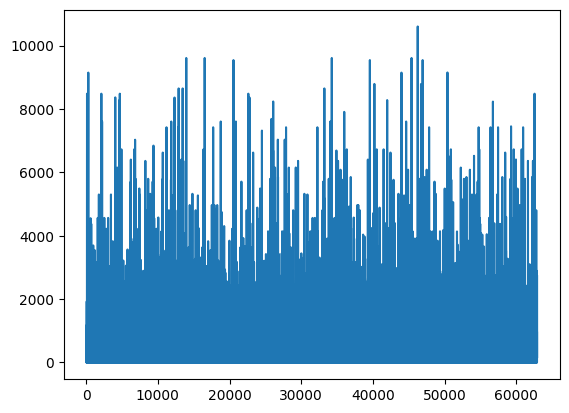

In [61]:
plt.plot(df_merge['Custo Total'])

In [62]:
df_plot = df_merge.copy()

In [63]:
df_plot.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Quantidade,Custo Total,Valor Total
0,1776007,1,2019-11-11,301,0,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio,196.14,196.14,592.00
1,1830002,4,2020-01-04,325,0,1790,4,AUD,MGS Dungeon Siege: Legends of Aranna 2009 E146,Tailspin Toys,Silver,21.92,43.00,702,Download Games,7,Games and Toys,87.68,87.68,172.00
2,1781006,1,2019-11-16,325,6,418,3,AUD,Adventure Works Desktop PC1.60 ED160 Silver,Adventure Works,Silver,137.63,269.95,303,Desktops,3,Computers,412.89,412.89,809.85
3,1830002,2,2020-01-04,325,0,731,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,59.32,129.00,306,"Printers, Scanners & Fax",3,Computers,59.32,59.32,129.00
4,1109001,2,2018-01-13,325,6,656,4,AUD,"Proseware Desk Jet All-in-One Printer, Scanner...",Proseware,Black,72.66,158.00,306,"Printers, Scanners & Fax",3,Computers,290.64,290.64,632.00


In [64]:
df_plot.sort_values(by='Order Date', inplace=True, ascending=True, ignore_index=True)

In [65]:
df_plot.set_index('Order Date', inplace=True)

In [66]:
df_plot.tail(150)

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Quantidade,Custo Total,Valor Total
Order Date,,,,,,,,,,,,,,,,,,,
2021-02-18,2241018,3,1553574,0,1690,1,USD,SV Hand Games for Office worker L28 Yellow,Southridge Video,Yellow,5.63,16.99,701,Boxed Games,7,Games and Toys,5.63,5.63,16.99
2021-02-18,2241005,2,1609703,57,804,6,USD,Contoso ADSL Modem Splitter/Filter X 2 E200 White,Contoso,White,11.68,22.90,308,Computers Accessories,3,Computers,70.08,70.08,137.40
2021-02-18,2241014,1,359587,8,179,2,CAD,SV 16xDVD M300 Silver,Southridge Video,Silver,54.72,119.00,202,VCD & DVD,2,TV and Video,109.44,109.44,238.00
2021-02-18,2241027,1,1842475,0,1452,1,USD,The Phone Company Touch Screen Phones SAW/On-w...,The Phone Company,Gold,134.74,293.00,503,Touch Screen Phones,5,Cell phones,134.74,134.74,293.00
2021-02-18,2241021,1,577201,24,871,3,EUR,Contoso Wireless Laser Mouse E50 White,Contoso,White,10.69,20.96,308,Computers Accessories,3,Computers,32.07,32.07,62.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-20,2243002,5,59159,5,1065,7,AUD,"A. Datum SLR Camera 35"" X358 Pink",A. Datum,Pink,194.82,588.00,402,Digital SLR Cameras,4,Cameras and camcorders,1363.74,1363.74,4116.00
2021-02-20,2243002,4,59159,5,419,2,AUD,Adventure Works Desktop PC1.80 ED180 Silver,Adventure Works,Silver,188.13,369.00,303,Desktops,3,Computers,376.26,376.26,738.00
2021-02-20,2243002,3,59159,5,1595,5,AUD,SV DVD 60 DVD Storage Binder L20 Red,Southridge Video,Red,7.58,22.89,602,Movie DVD,6,"Music, Movies and Audio Books",37.90,37.90,114.45


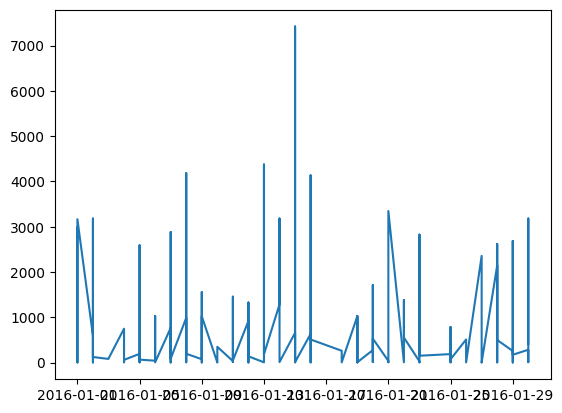

In [67]:
plt.plot(df_plot.loc['2016-01-01':'2016-01-31']['Custo Total'])

# Visualizações com Seaborn

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Contoso'),
  Text(1, 0, 'Wide World Importers'),
  Text(2, 0, 'Northwind Traders'),
  Text(3, 0, 'Adventure Works'),
  Text(4, 0, 'Southridge Video'),
  Text(5, 0, 'Litware'),
  Text(6, 0, 'Fabrikam'),
  Text(7, 0, 'Proseware'),
  Text(8, 0, 'A. Datum'),
  Text(9, 0, 'The Phone Company'),
  Text(10, 0, 'Tailspin Toys')])

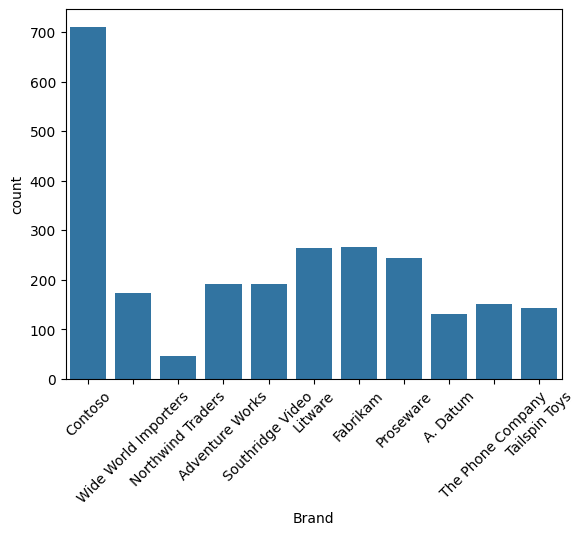

In [68]:
sns.countplot(data=df_products, x='Brand')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Audio'),
  Text(1, 0, 'TV and Video'),
  Text(2, 0, 'Computers'),
  Text(3, 0, 'Cameras and camcorders'),
  Text(4, 0, 'Cell phones'),
  Text(5, 0, 'Music, Movies and Audio Books'),
  Text(6, 0, 'Games and Toys'),
  Text(7, 0, 'Home Appliances')])

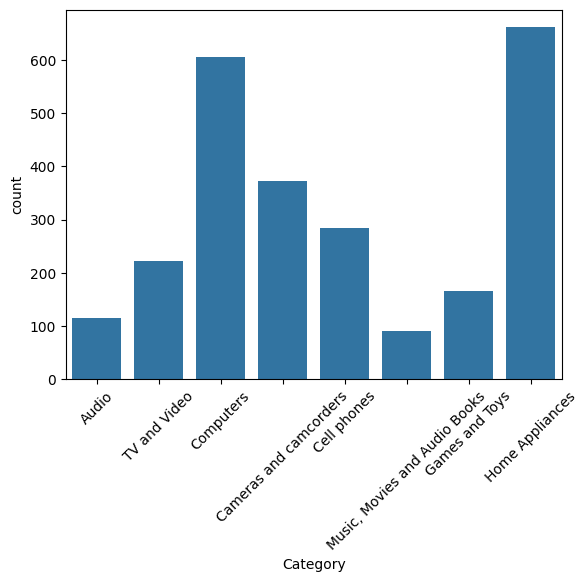

In [69]:
sns.countplot(data=df_products, x='Category')
plt.xticks(rotation=45)

<Axes: ylabel='Unit Cost USD'>

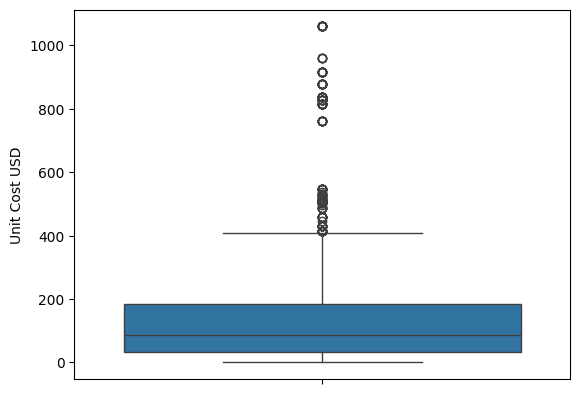

In [70]:
sns.boxplot(data=df_products, y='Unit Cost USD')

<Axes: >

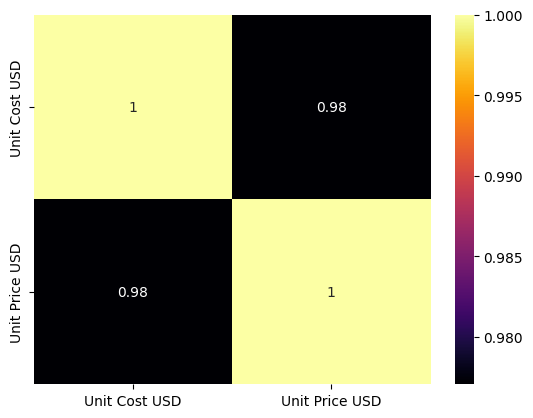

In [71]:
sns.heatmap(df_products[['Unit Cost USD','Unit Price USD']].corr(), cmap='inferno', annot=True)